# Principal component analysis (PCA)




Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the analysis of gene expression data, and many more.
The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense


This is what PCA is all about:

Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.


PCA yields the directions (principal components) that maximize the variance of the data
In other words, PCA projects the entire dataset onto a different feature (sub)space
PCA and Dimensionality Reduction Often, the desired goal is to reduce the dimensions of a 𝑑-dimensional dataset by projecting it onto a (𝑘)-dimensional subspace (where 𝑘<𝑑) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of 𝑘 that represents the data 'well'?"

Later, we will compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix. Each of those eigenvectors is associated with an eigenvalue which can be interpreted as the "length" or "magnitude" of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.


A Summary of the PCA Approach:

1.Standardize the data. 2.Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix. 3.Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace (𝑘≤𝑑)/. 4.Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors. 5.Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘. 

The first principal component is the linear combination with maximal variance. The second principal component is the linear combination with maximal variance in a direction orthogonal to the first principal component, and so on. The first principal component also represents the line that minimizes the total sum of squared perpendicular distances from the points to the line.

There are four common methods that can be used to decide how many components to retain in order to effectively summarize the data. Three of the four methods are based on the eigenvalues of the covariance matrix (or correlation matrix).



In [4]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


# get the path of the file of lecture1.ipynb
location_of_data = "/Users/rahuldwivedi/Downloads/ovariandata/"
rna_file_name = "ovadata_RNA_Seq_v2_expression_median.txt"
clinical_file_name = "data_clinical_patient.txt"

In [5]:
def read_rna_file(location, name_file):
        """
        input location: string, location of the file
        input name_file:string, name of the RNA seq file
        This file is tab seperated and includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
        Out put: panda data frame
        function: read the file and set the 'Hugo_Symbol', 'Entrez_Gene_Id' columns as index
        """

        import pandas as pd
    
        rna_file_path = location + name_file

        rna = pd.read_csv(rna_file_path,  sep='\t')
        
        #to make sure we do not process the name of genes we will convert them to string
        rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
        
        dic_genes_id ={}
        #make a dictionary of names of genes.
        dic_genes_id = pd.Series(rna.Hugo_Symbol.values,index=rna.Entrez_Gene_Id).to_dict()

        #deleting Hugo_Symbol 
        rna = rna.drop(columns=['Hugo_Symbol'], axis=1)
        
        # make first two columns as indexx of data frame 
        rna =  rna.set_index(['Entrez_Gene_Id']) 

    
        return (rna, dic_genes_id)

In [6]:
(rna, dic_genes_id) = read_rna_file(location_of_data, rna_file_name)
#clinical = read_clinical_file(location_of_data, clinical_file_name)
rna.head()

,TCGA-04-1348-01,TCGA-04-1357-01,TCGA-04-1362-01,TCGA-04-1364-01,TCGA-04-1365-01,TCGA-04-1514-01,TCGA-04-1519-01,TCGA-09-0364-01,TCGA-09-0366-01,TCGA-09-0367-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100133144,22.028266,17.671802,21.976720,14.940150,10.382058,2.733694,19.315232,20.896304,5.421443,1.190590,...,4.923308,20.466544,41.372838,20.519959,7.149914,21.566391,32.307387,26.118873,34.475700,126.819903
100134869,25.716221,20.473921,29.909980,7.827355,4.877826,6.227180,15.088948,27.821347,10.171431,24.953771,...,2.486953,29.214073,43.867435,48.929509,6.756215,8.630438,26.618719,15.716029,28.912917,59.400754
10357,321.241331,128.865135,424.021806,400.227877,891.927121,380.425710,507.815414,856.606003,371.023437,218.291376,...,335.265779,131.919622,305.443765,68.665161,225.455747,92.597754,203.931820,400.614342,309.174887,431.623999
10431,1952.678661,901.425735,1366.864827,1775.819439,1886.589299,1371.327702,1525.885484,721.340307,1070.351388,1392.102710,...,1596.217812,1128.424392,1026.626852,1172.472325,1142.036809,1291.281828,588.503145,1304.656225,1345.236051,1460.986221
155060,222.150613,244.412320,377.449014,339.460985,128.196713,396.171828,89.765797,586.616738,314.560329,111.235044,...,264.341700,687.011933,528.956140,570.717733,228.074966,439.904885,510.841037,387.776781,412.614342,540.597847


In [7]:
dic_genes_id

{'100133144': 'nan',
 '100134869': 'nan',
 '10357': 'nan',
 '10431': 'nan',
 '155060': 'nan',
 '26823': 'nan',
 '340602': 'nan',
 '388795': 'nan',
 '390284': 'nan',
 '391714': 'nan',
 '553137': 'nan',
 '57714': 'nan',
 '645851': 'nan',
 '652919': 'nan',
 '653553': 'nan',
 '728788': 'nan',
 '729884': 'nan',
 '8225': 'nan',
 '90288': 'nan',
 '1': 'A1BG',
 '29974': 'A1CF',
 '54715': 'A2BP1',
 '87769': 'A2LD1',
 '2': 'A2M',
 '144568': 'A2ML1',
 '53947': 'A4GALT',
 '51146': 'A4GNT',
 '404744': 'AAA1',
 '8086': 'AAAS',
 '65985': 'AACS',
 '729522': 'AACSL',
 '13': 'AADAC',
 '344752': 'AADACL2',
 '126767': 'AADACL3',
 '343066': 'AADACL4',
 '51166': 'AADAT',
 '79719': 'AAGAB',
 '22848': 'AAK1',
 '14': 'AAMP',
 '15': 'AANAT',
 '16': 'AARS',
 '57505': 'AARS2',
 '80755': 'AARSD1',
 '132949': 'AASDH',
 '60496': 'AASDHPPT',
 '10157': 'AASS',
 '26574': 'AATF',
 '9625': 'AATK',
 '18': 'ABAT',
 '10349': 'ABCA10',
 '19': 'ABCA1',
 '79963': 'ABCA11P',
 '26154': 'ABCA12',
 '154664': 'ABCA13',
 '650655': '

# Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

In [8]:
def normalizing_patients(df_rna_values):
    
    """
        input df_rna: rna-seq data frame that includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using pandas methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
    """
    
    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    return df_normalized_rna_values

In [9]:
normalized_rna = normalizing_patients(rna)
normalized_rna.head()

,TCGA-04-1348-01,TCGA-04-1357-01,TCGA-04-1362-01,TCGA-04-1364-01,TCGA-04-1365-01,TCGA-04-1514-01,TCGA-04-1519-01,TCGA-09-0364-01,TCGA-09-0366-01,TCGA-09-0367-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100133144,0.000077,0.000076,0.000088,0.000022,0.000045,0.000020,0.000095,0.000078,0.000041,0.000004,...,0.000011,0.000103,0.000259,0.000099,0.000045,0.000088,0.000109,0.000098,0.000254,0.000571
100134869,0.000090,0.000088,0.000120,0.000012,0.000021,0.000046,0.000074,0.000104,0.000077,0.000083,...,0.000006,0.000147,0.000274,0.000237,0.000042,0.000035,0.000090,0.000059,0.000213,0.000267
10357,0.001129,0.000555,0.001707,0.000597,0.003893,0.002791,0.002501,0.003210,0.002793,0.000726,...,0.000778,0.000665,0.001911,0.000333,0.001412,0.000376,0.000691,0.001506,0.002274,0.001943
10431,0.006860,0.003885,0.005503,0.002647,0.008234,0.010059,0.007516,0.002703,0.008058,0.004633,...,0.003702,0.005687,0.006421,0.005679,0.007152,0.005241,0.001993,0.004906,0.009895,0.006577
155060,0.000780,0.001053,0.001520,0.000506,0.000560,0.002906,0.000442,0.002198,0.002368,0.000370,...,0.000613,0.003463,0.003309,0.002764,0.001428,0.001786,0.001730,0.001458,0.003035,0.002434


In [10]:
normalized_rna_t=normalized_rna.transpose()
normalized_rna_t.head()

Entrez_Gene_Id,100133144,100134869,10357,10431,155060,26823,340602,388795,390284,391714,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-04-1348-01,0.000077,0.000090,0.001129,0.006860,0.000780,2.377105e-06,-2.102659e-07,0.000011,0.000016,-1.156821e-06,...,0.003577,0.004152,0.000090,0.000665,0.002754,0.000024,0.001700,0.034052,0.001510,0.001670
TCGA-04-1357-01,0.000076,0.000088,0.000555,0.003885,0.001053,3.891014e-07,-2.067190e-06,0.000021,0.000022,-1.419197e-06,...,0.000922,0.001396,0.000341,0.002024,0.005075,0.000021,0.002235,0.014157,0.002950,0.001788
TCGA-04-1362-01,0.000088,0.000120,0.001707,0.005503,0.001520,1.816453e-06,1.817713e-05,0.000014,0.000018,3.142890e-06,...,0.001861,0.003626,0.000270,0.002556,0.006011,0.000269,0.003186,0.015090,0.003085,0.003232
TCGA-04-1364-01,0.000022,0.000012,0.000597,0.002647,0.000506,1.345562e-07,1.258279e-06,0.000004,0.000009,-6.692118e-08,...,0.001493,0.002394,0.000015,0.000165,0.001609,0.000023,0.001045,0.005436,0.000472,0.000662
TCGA-04-1365-01,0.000045,0.000021,0.003893,0.008234,0.000560,3.940303e-07,-2.093376e-06,0.000004,0.000032,3.271511e-07,...,0.003093,0.012221,0.000112,0.001154,0.006023,0.000038,0.003891,0.019223,0.001907,0.003430


# PCA Projection to 5D

In [11]:
normalized_rna.dropna(inplace=True,axis=1) # dropping missing values
normalized_rna.head()

,TCGA-04-1348-01,TCGA-04-1357-01,TCGA-04-1362-01,TCGA-04-1364-01,TCGA-04-1365-01,TCGA-04-1514-01,TCGA-04-1519-01,TCGA-09-0364-01,TCGA-09-0366-01,TCGA-09-0367-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100133144,0.000077,0.000076,0.000088,0.000022,0.000045,0.000020,0.000095,0.000078,0.000041,0.000004,...,0.000011,0.000103,0.000259,0.000099,0.000045,0.000088,0.000109,0.000098,0.000254,0.000571
100134869,0.000090,0.000088,0.000120,0.000012,0.000021,0.000046,0.000074,0.000104,0.000077,0.000083,...,0.000006,0.000147,0.000274,0.000237,0.000042,0.000035,0.000090,0.000059,0.000213,0.000267
10357,0.001129,0.000555,0.001707,0.000597,0.003893,0.002791,0.002501,0.003210,0.002793,0.000726,...,0.000778,0.000665,0.001911,0.000333,0.001412,0.000376,0.000691,0.001506,0.002274,0.001943
10431,0.006860,0.003885,0.005503,0.002647,0.008234,0.010059,0.007516,0.002703,0.008058,0.004633,...,0.003702,0.005687,0.006421,0.005679,0.007152,0.005241,0.001993,0.004906,0.009895,0.006577
155060,0.000780,0.001053,0.001520,0.000506,0.000560,0.002906,0.000442,0.002198,0.002368,0.000370,...,0.000613,0.003463,0.003309,0.002764,0.001428,0.001786,0.001730,0.001458,0.003035,0.002434


In [12]:
pca = PCA(n_components=10)
#n_components == min(n_samples, n_features)

In [13]:
principalComponents = pca.fit_transform(normalized_rna_t )

In [14]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2','pc 3','pc4','pc 5','pc 6','pc 7','pc 8','pc 9','pc 10'])

In [15]:
principalDf.head()

,pc 1,pc 2,pc 3,pc4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10
0,-0.457836,0.058310,-0.179544,0.821489,-0.193478,0.195237,0.234737,-0.047208,-0.155141,-0.033254
1,-0.045621,-0.041569,-0.662288,0.834259,-0.025485,0.143724,0.138539,0.437679,0.045443,-0.260083
2,-0.445636,-0.267174,0.146089,0.234166,0.207893,0.173481,-0.013541,-0.099477,-0.475086,0.285060
3,-1.762577,-0.516195,0.377996,0.214875,0.303050,0.243230,-0.230360,0.111293,-0.169849,-0.009177
4,-0.255088,0.014080,0.284753,0.590885,-0.008498,0.077336,0.660952,-0.490498,0.124071,-0.220277


In [16]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold=0.0304):
    selector = VarianceThreshold(threshold)
    selector.fit_transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

topgenes=variance_threshold_selector(normalized_rna_t, 0.0304)
topgenes.head()

Entrez_Gene_Id,60,71,567,718,972,1191,1277,1278,1281,1915,...,2495,2597,283120,3481,96610,6132,6222,6188,6194,7178
TCGA-04-1348-01,0.501157,0.249682,0.294547,0.131190,1.000000,0.028697,0.069028,0.047279,0.024249,0.183659,...,0.202629,0.449789,0.197605,0.009529,0.022323,0.145715,0.165588,0.126292,0.155694,0.227923
TCGA-04-1357-01,0.486211,0.152747,0.553642,0.126835,1.000000,0.501043,0.144819,0.100185,0.061397,0.658017,...,0.368003,0.359466,0.004170,0.040637,0.399513,0.359117,0.336082,0.224122,0.256160,0.322262
TCGA-04-1362-01,0.368216,0.400871,0.077642,0.068805,0.125584,0.086541,0.050296,0.033438,0.015570,0.571312,...,1.000000,0.301870,0.000640,0.493489,0.001427,0.368181,0.304159,0.258551,0.122995,0.271210
TCGA-04-1364-01,0.166279,0.100943,0.017358,0.012590,0.004711,0.012596,0.011310,0.010608,0.004498,0.164350,...,0.029943,0.050258,0.009681,1.000000,0.000579,0.149953,0.119808,0.072074,0.084218,0.069593
TCGA-04-1365-01,0.540351,0.388457,0.320908,0.073854,0.421103,0.105748,0.052526,0.056159,0.023780,0.334952,...,0.208163,0.483308,1.000000,0.019999,0.047981,0.298796,0.221242,0.175077,0.201601,0.153315


In [17]:
name_top_genes = list(topgenes)

genes_hugo_names = [ dic_genes_id[gene] for gene in name_top_genes]
genes_hugo_names

['ACTB',
 'ACTG1',
 'B2M',
 'C3',
 'CD74',
 'CLU',
 'COL1A1',
 'COL1A2',
 'COL3A1',
 'EEF1A1',
 'FN1',
 'FTH1',
 'GAPDH',
 'H19',
 'IGF2',
 'LOC96610',
 'RPL8',
 'RPS18',
 'RPS3',
 'RPS6',
 'TPT1']

In [ ]:
corr =rna_top10.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(rna_top10.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(rna_top10.columns)
ax.set_yticklabels(rna_top10.columns)
plt.show()

(0.6922665598201707, 4.00415815416193e-44)


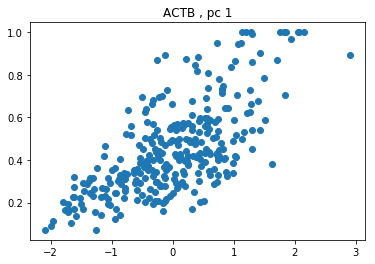

(0.6976640026330831, 4.573051274434222e-45)


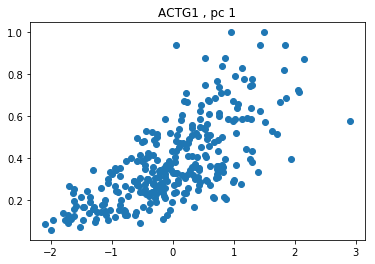

(0.578829703945535, 3.127877347412446e-28)


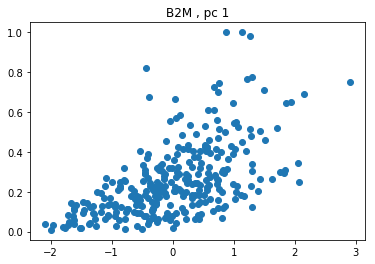

(0.3385113611555844, 1.773659255625886e-09)


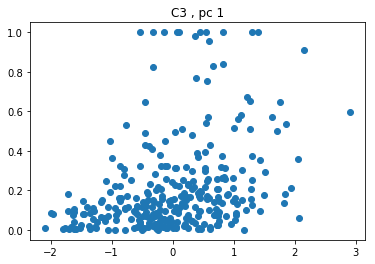

(0.3822120353428844, 7.1577897812816425e-12)


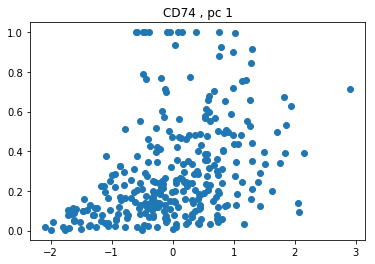

(0.31386417773479847, 2.7827949266050716e-08)


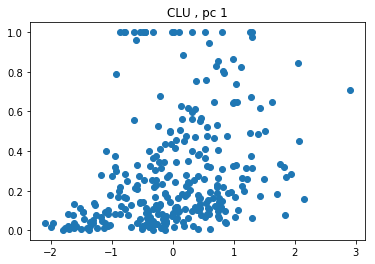

(-0.12407173125459708, 0.03168821962463835)


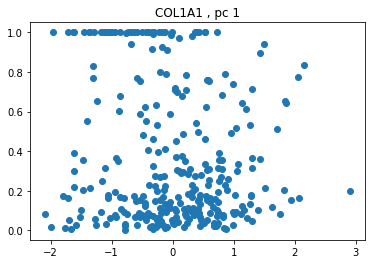

(-0.04140025785527177, 0.47498834233507825)


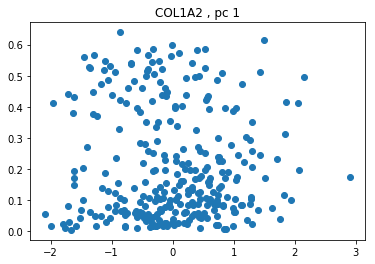

(-0.1406325982770099, 0.014777508516877848)


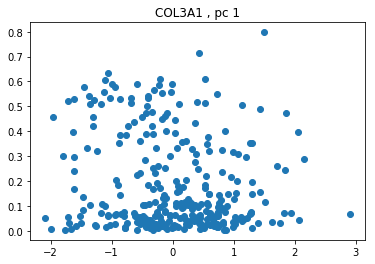

(0.5853810802838899, 5.545362224314271e-29)


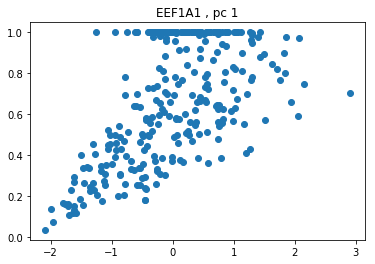

(-0.10281478661168147, 0.07538990816141383)


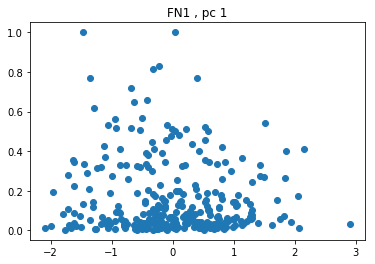

(0.5344069838982141, 1.4830395020300743e-23)


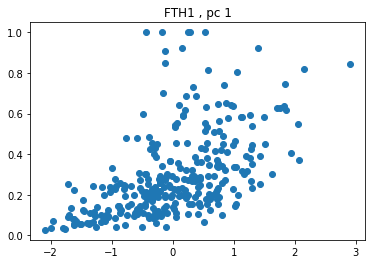

(0.6559590914487959, 2.747820637149063e-38)


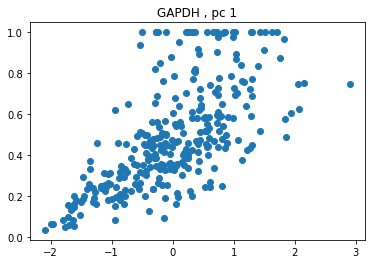

(-0.042348943414155175, 0.46491905374560316)


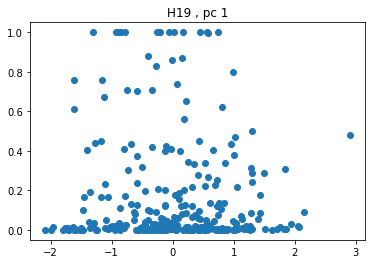

(-0.39341273950855615, 1.5171499769163925e-12)


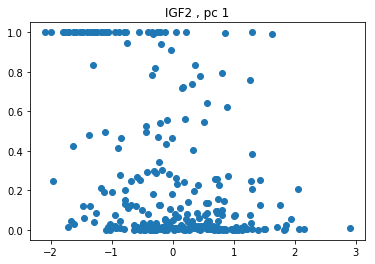

(0.030405717206900044, 0.5998854739195778)


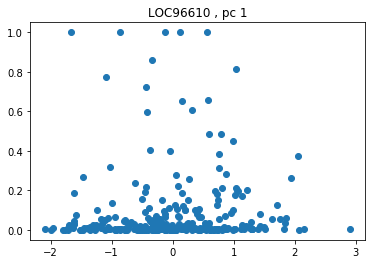

(0.6213526949713495, 1.98426541989859e-33)


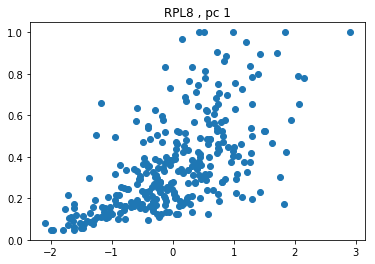

(0.5884790736558045, 2.4137111971883195e-29)


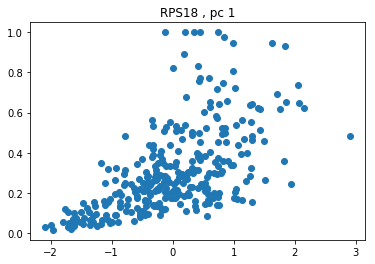

(0.5984944482313393, 1.5411727879443023e-30)


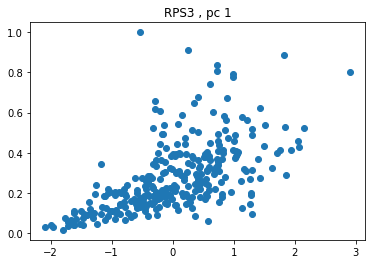

(0.6516227371234049, 1.2096754483332945e-37)


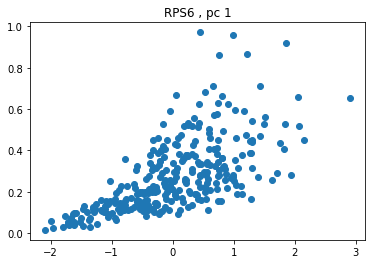

(0.5277064418193897, 6.575660230027408e-23)


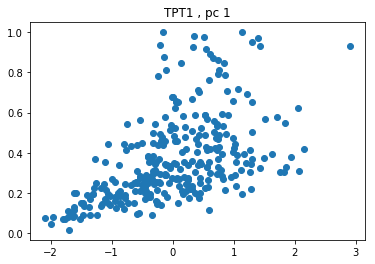

(0.486561628616019, 3.095962693663314e-19)


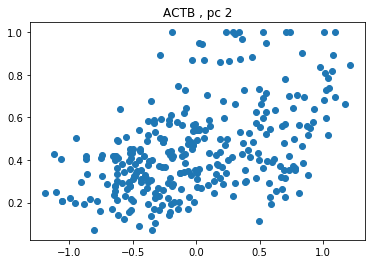

(0.22654913015353942, 7.521325485495008e-05)


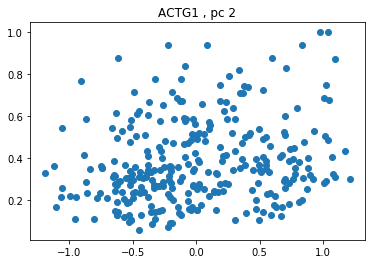

(0.247246764475784, 1.4775675757631562e-05)


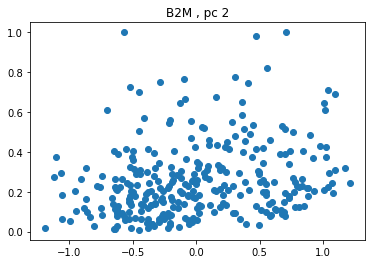

(0.23713555076132248, 3.332025946287976e-05)


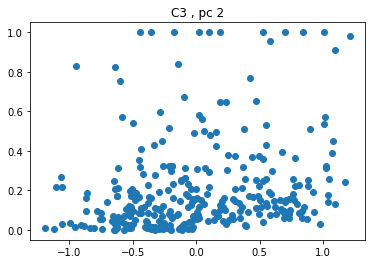

(0.26413949419584537, 3.5082320270114294e-06)


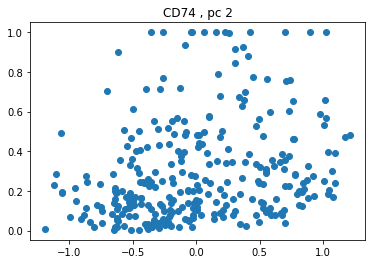

(-0.04062522748915416, 0.48330206416525523)


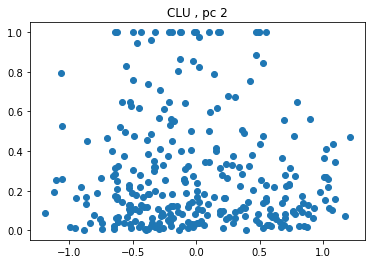

(0.7960153547388107, 6.094442846109054e-67)


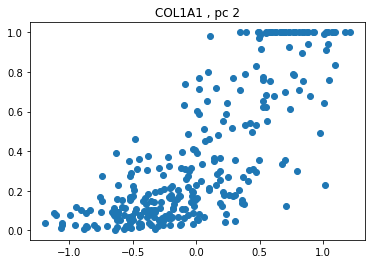

(0.7781050145562511, 3.909491773221879e-62)


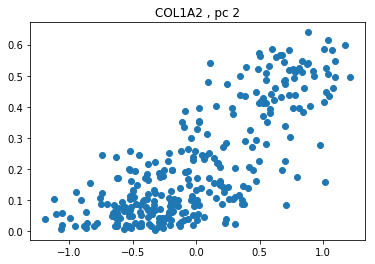

(0.7652438241741145, 5.963298777184798e-59)


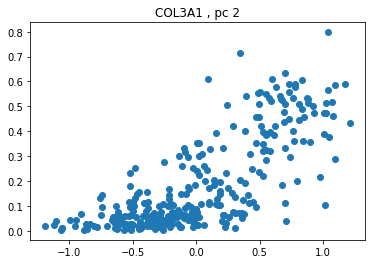

(-0.37782601582792913, 1.2933170451833265e-11)


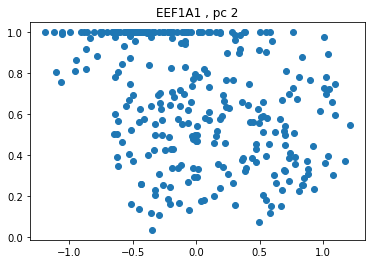

(0.6918613555381772, 4.703440259881016e-44)


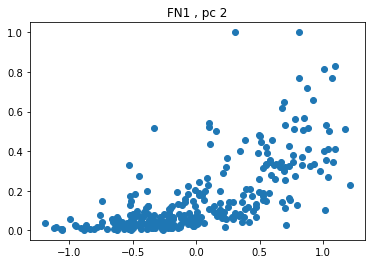

(0.28270431953466074, 6.422598026468895e-07)


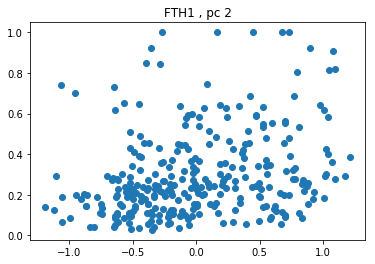

(-0.0508482681321783, 0.38015595138162195)


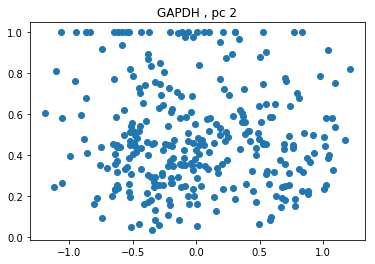

(0.12847501938522865, 0.026068335803230012)


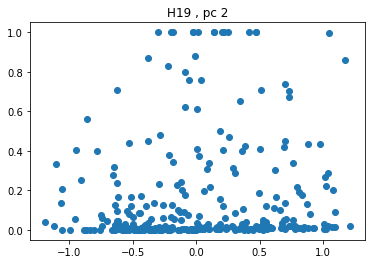

(-0.07035560387572974, 0.22436086169465722)


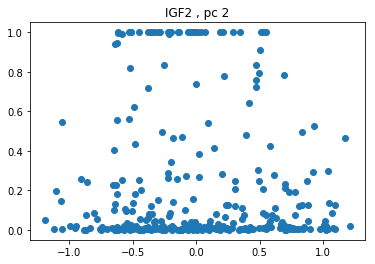

(0.1543859692663597, 0.007385114117083149)


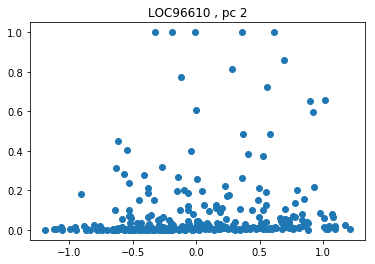

(-0.1756324662057479, 0.0022648238386197474)


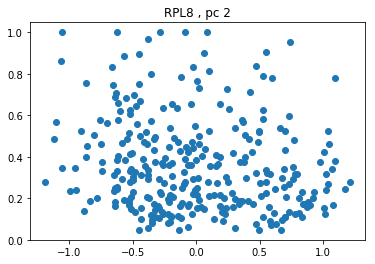

(-0.3988338835392699, 7.00916615400887e-13)


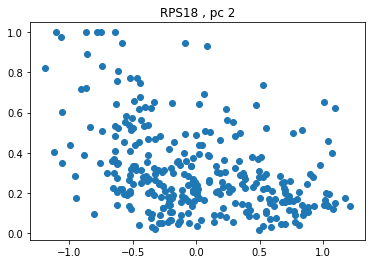

(-0.36099514541472427, 1.1548815821247153e-10)


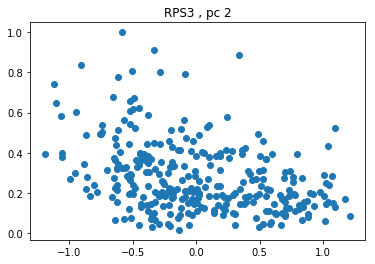

(-0.3012987888466389, 1.0318630231863593e-07)


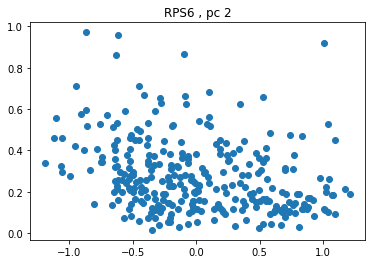

(-0.3411525255498274, 1.3011909950107578e-09)


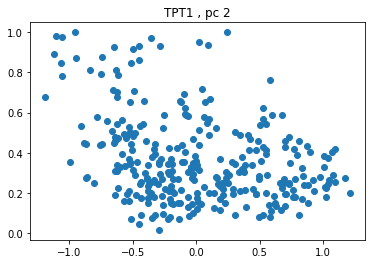

(0.19739951807201117, 0.0005845507836915929)


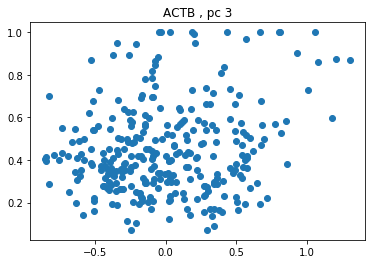

(0.19462831030697336, 0.0007003105729384168)


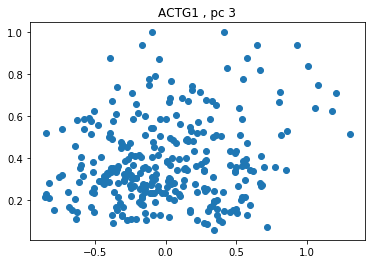

(-0.3350357106095233, 2.654508267369627e-09)


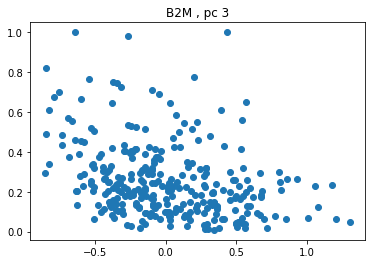

(-0.2905771094804632, 3.0088504948218275e-07)


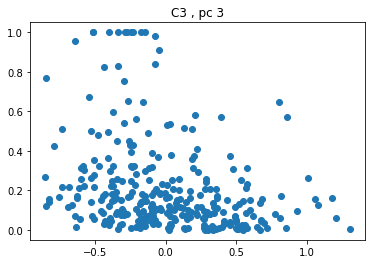

(-0.4456475375931504, 4.822026484338243e-16)


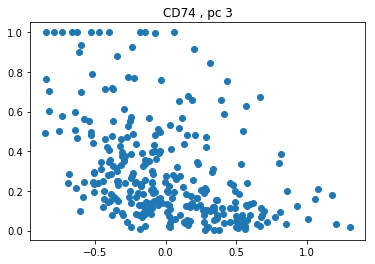

(-0.1775676717269572, 0.0020198830255447582)


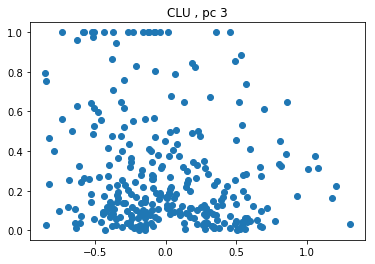

(-0.20499340428569426, 0.0003518463957427901)


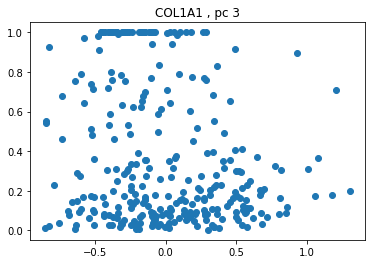

(-0.1836278335596007, 0.0014009481722183667)


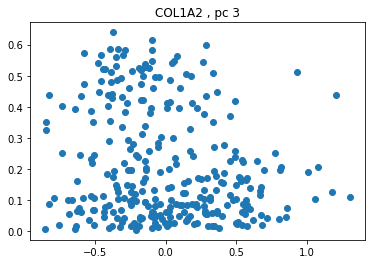

(-0.20999990878790004, 0.00024923070092076123)


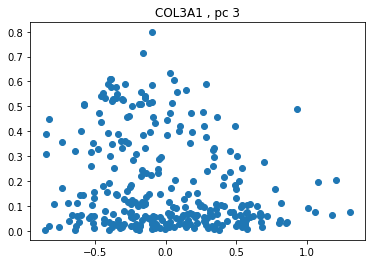

(-0.03691879779843357, 0.5241248234985704)


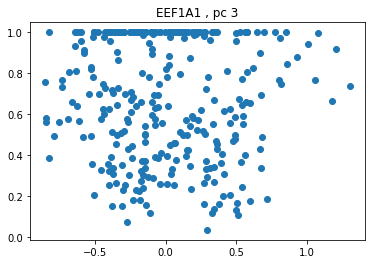

(-0.21299478689260237, 0.0002019920538203013)


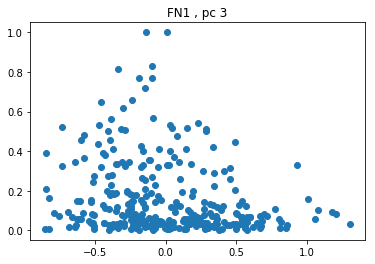

(-0.2676777398850704, 2.5629099991587907e-06)


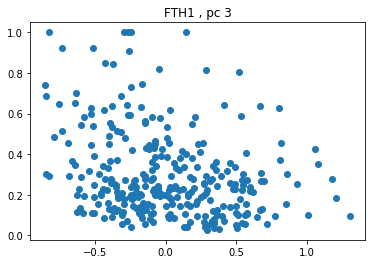

(0.1264810340595805, 0.0284971221508518)


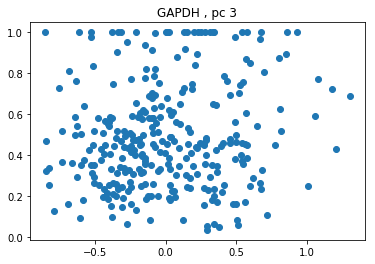

(0.29205841217176054, 2.602035895968094e-07)


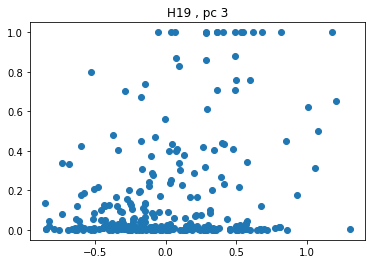

(0.5305952141175044, 3.4742136891039343e-23)


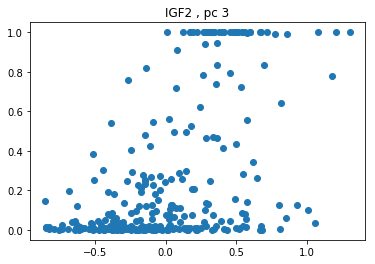

(-0.11323269262483168, 0.05006991928704983)


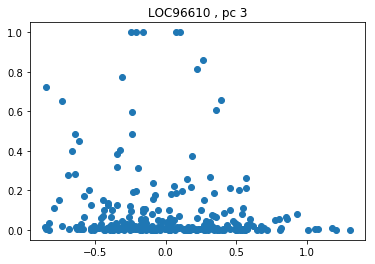

(-0.29525624349656815, 1.896244645421836e-07)


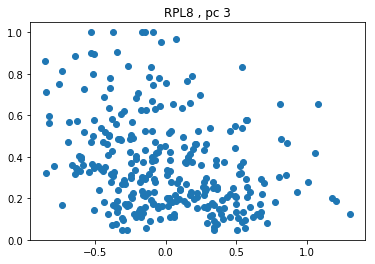

(-0.09092458968575735, 0.1160567075745943)


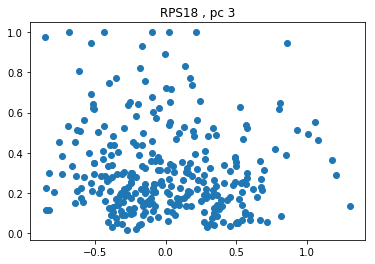

(-0.20077919964195734, 0.0004674015995247517)


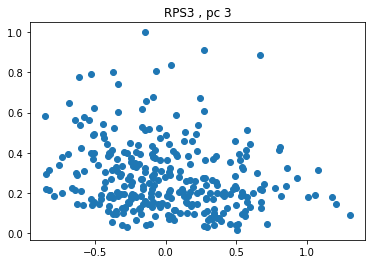

(-0.13327330682096766, 0.020941674325337476)


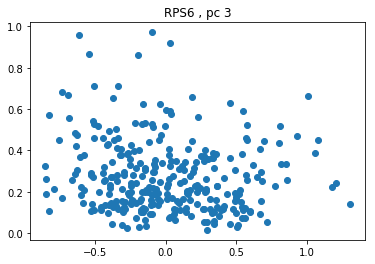

(-0.3424027055748132, 1.1225884918420988e-09)


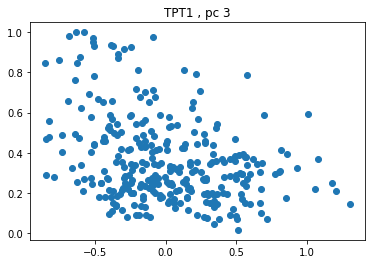

(0.03252499392483338, 0.5746979372478079)


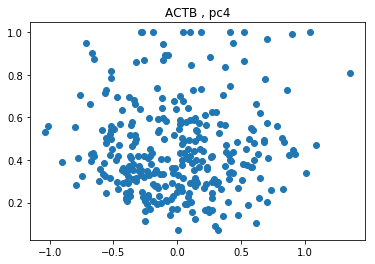

(-0.14394593711790538, 0.012566647458899877)


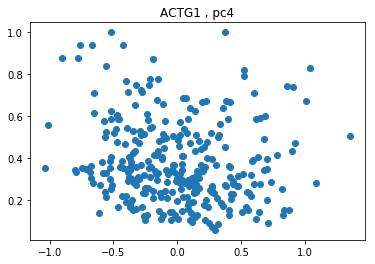

(0.4110132026932033, 1.1738642022881574e-13)


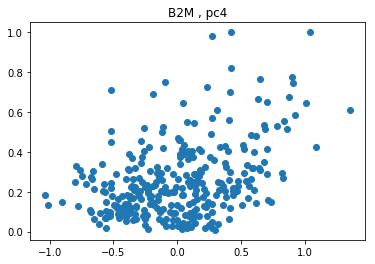

(0.12199529171565192, 0.03467835808234713)


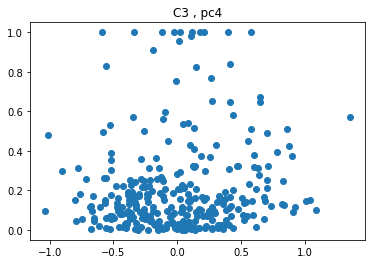

(0.4897074735489618, 1.6872012877424928e-19)


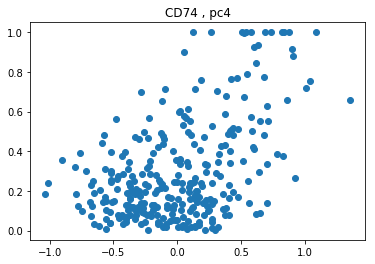

(0.260905974617066, 4.655878428071235e-06)


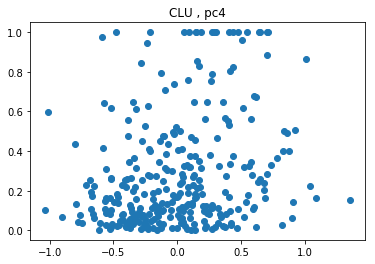

(-0.5298962340300317, 4.0564338171556826e-23)


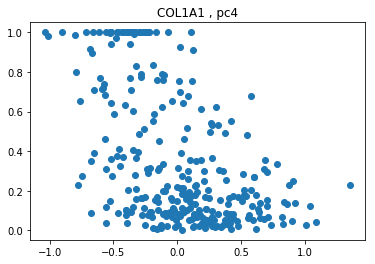

(-0.5527716165330191, 2.101821389175912e-25)


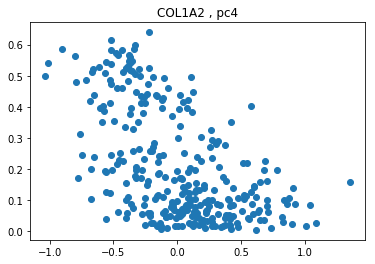

(-0.5202966067226651, 3.285990437200815e-22)


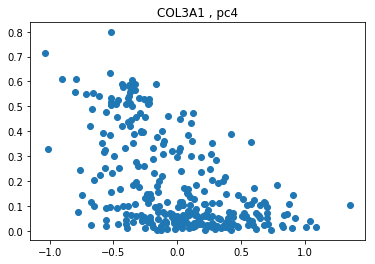

(-0.26929878504138144, 2.2162070987663926e-06)


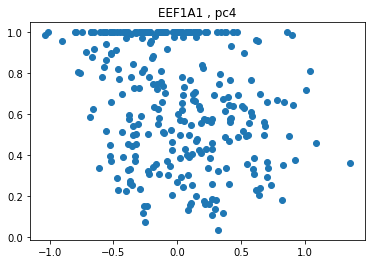

(-0.40121397652973, 4.971504156798917e-13)


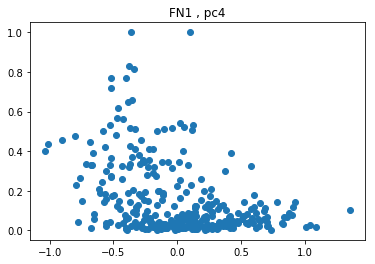

(0.17092236683711684, 0.002978106013385242)


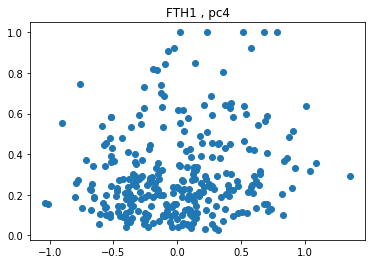

(-0.07956802371277004, 0.16925998134363876)


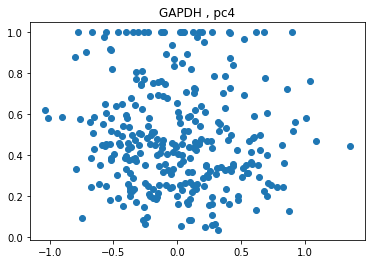

(0.011881156083684487, 0.8376222869288006)


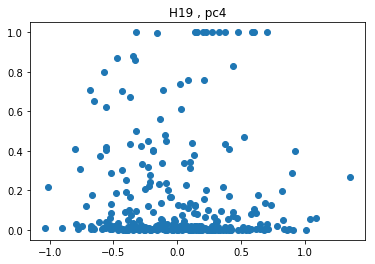

(-0.15726522009977853, 0.0063421366304002805)


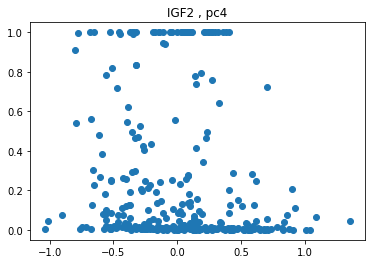

(0.2339920008588004, 4.260065786975872e-05)


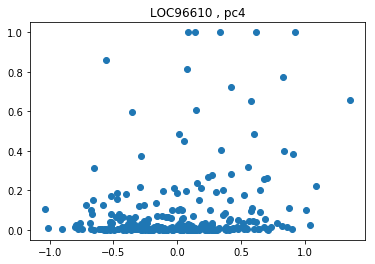

(-0.17025770070353108, 0.0030937356273712958)


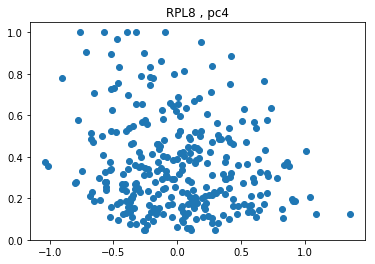

(-0.26370024842599843, 3.646531597731327e-06)


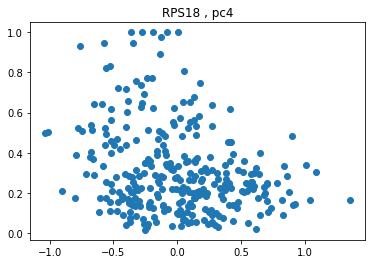

(-0.23174801851669213, 5.066409725530947e-05)


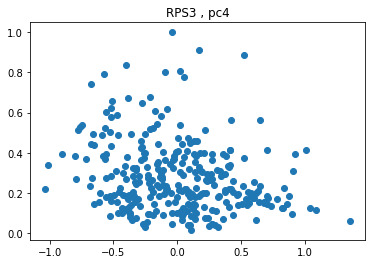

(-0.16966897372704684, 0.0031995397948470826)


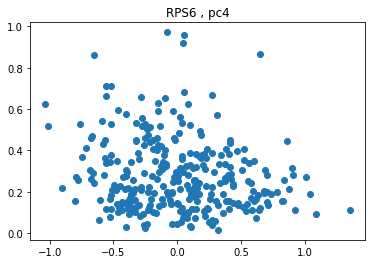

(-0.31791361507834964, 1.8002718241477892e-08)


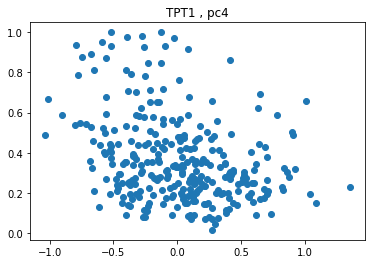

(-0.014488902360057235, 0.8026487416036404)


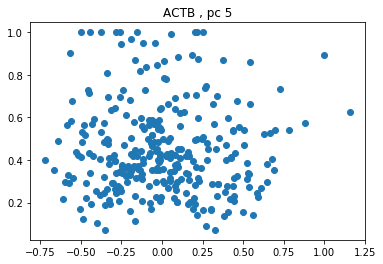

(-0.07732857919532775, 0.18162126208207366)


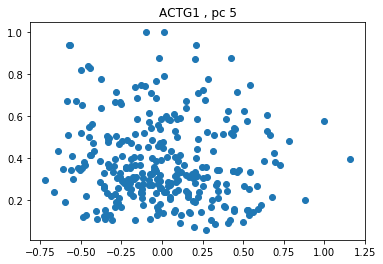

(0.0952348474335692, 0.09968683762745673)


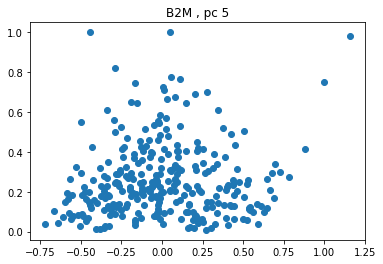

(0.19090330022658084, 0.0008894184338104544)


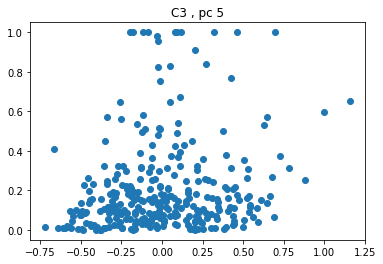

(0.059472430983717614, 0.3045610619780596)


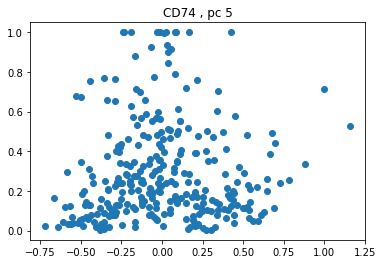

(0.2866431636744329, 4.407658913139931e-07)


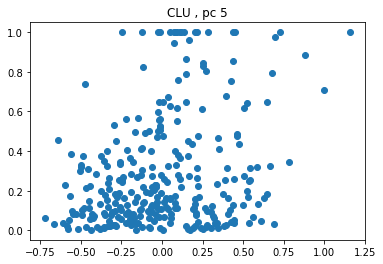

(0.025708564538792916, 0.6574042705279979)


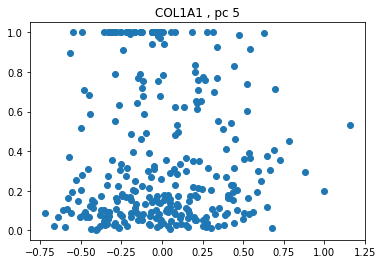

(-0.0014979510085214047, 0.9793873708425378)


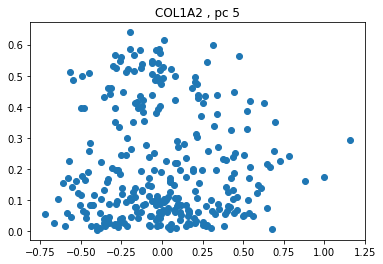

(0.012541480492178386, 0.8287332702863747)


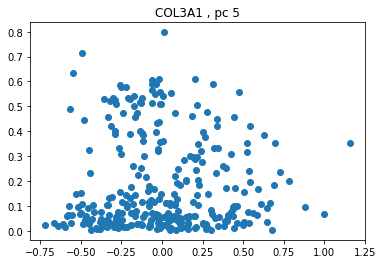

(-0.25960314637111137, 5.212774969290502e-06)


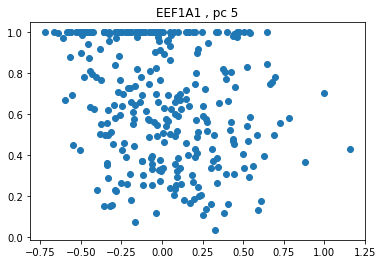

(-0.08994632352265565, 0.12004975357610231)


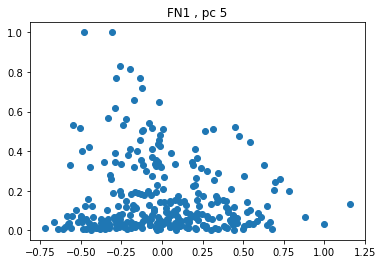

(0.22972069855549745, 5.9167347939802415e-05)


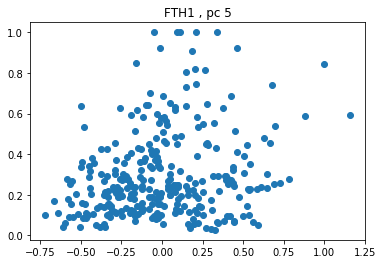

(-0.11371368897859446, 0.04909754898173443)


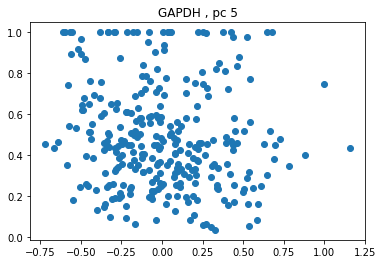

(0.3233784840771321, 9.898904730380757e-09)


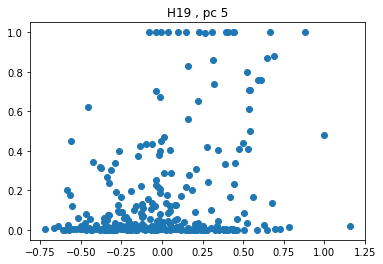

(0.6245902342148362, 7.392630133287002e-34)


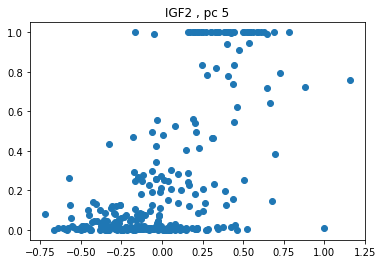

(-0.11837930375163655, 0.04045818567226489)


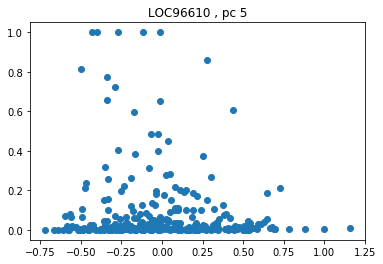

(0.3250464910329987, 8.2275043432155e-09)


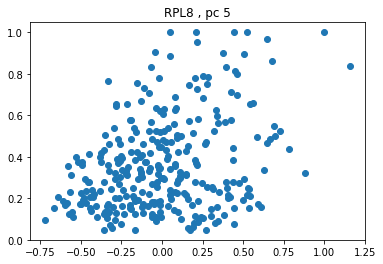

(0.03897577419888895, 0.5012542651088626)


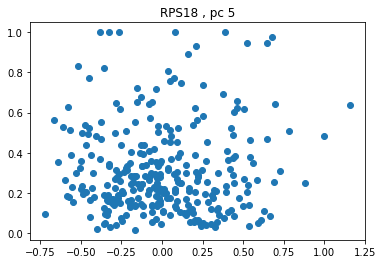

(0.10860210698213711, 0.060278453539672525)


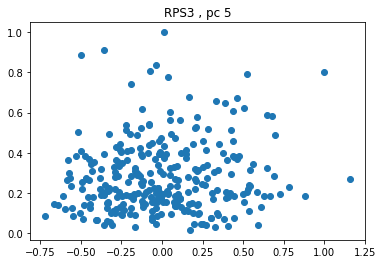

(-0.05198265320140915, 0.3696047442159063)


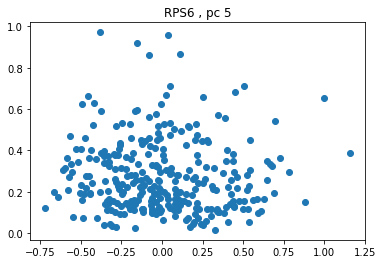

(0.19194678242214694, 0.0008321773060177169)


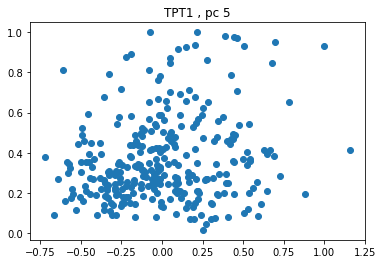

(0.028610276362818272, 0.621605060982956)


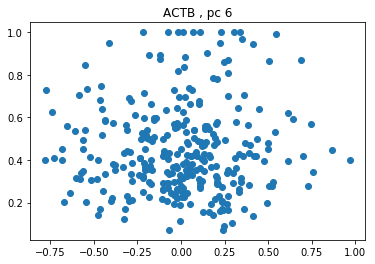

(0.10147461152263677, 0.0792958067249515)


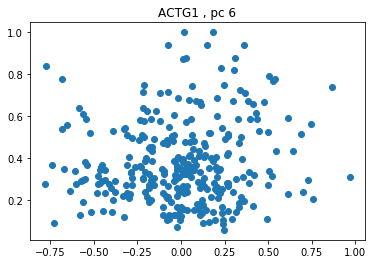

(0.24360824326463756, 1.987871328346347e-05)


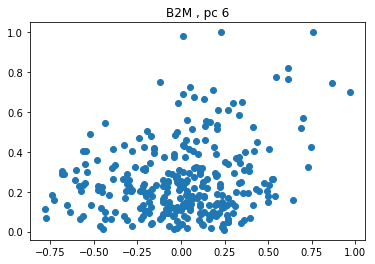

(-0.3294340876857437, 5.031048161195911e-09)


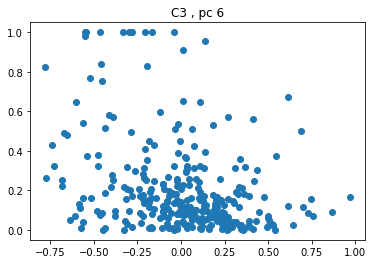

(0.04272929983258918, 0.46091539303093176)


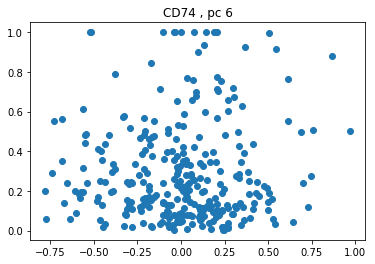

(-0.6515098432232385, 1.2568571750517109e-37)


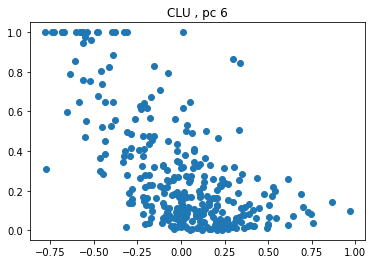

(-0.006682666454099118, 0.9082348748230411)


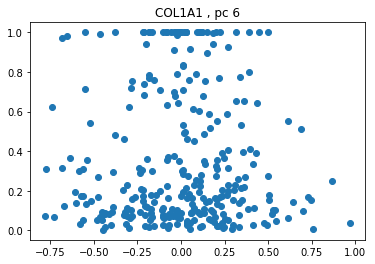

(-0.02077416795012943, 0.7200771446279838)


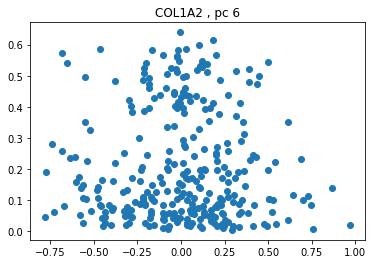

(0.0409041350818074, 0.48030121209107457)


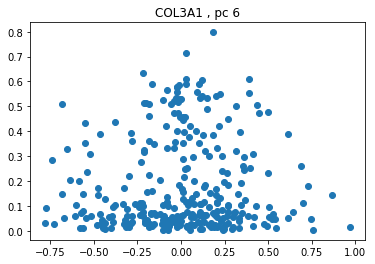

(-0.061583635204032317, 0.2876838446052225)


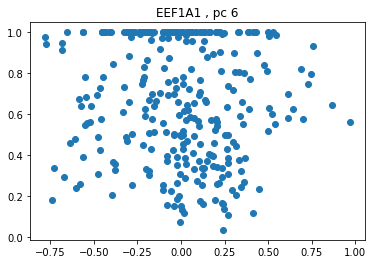

(-0.02921881415907419, 0.614205434867287)


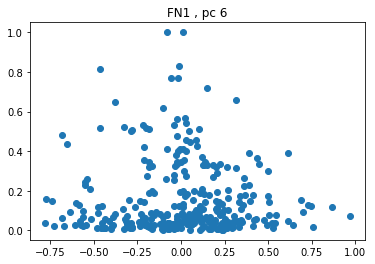

(0.1428232791611581, 0.013280720779272802)


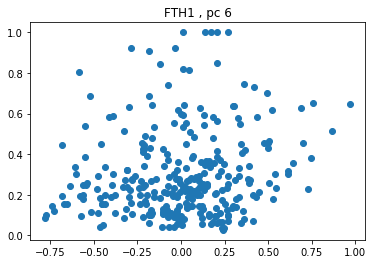

(0.043776964476295074, 0.44998736091884584)


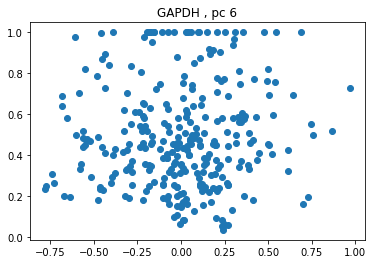

(-0.16498222674510174, 0.0041660525975697965)


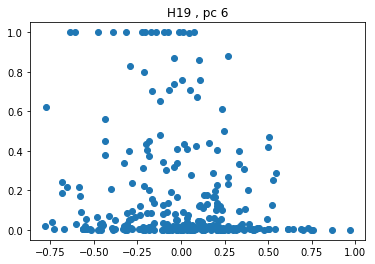

(0.21702212106084706, 0.00015156532954973973)


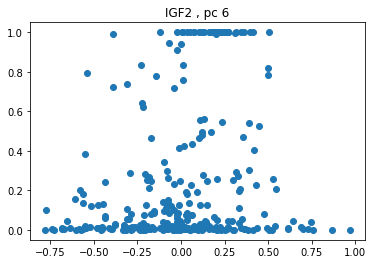

(0.2943576889392697, 2.073372203567933e-07)


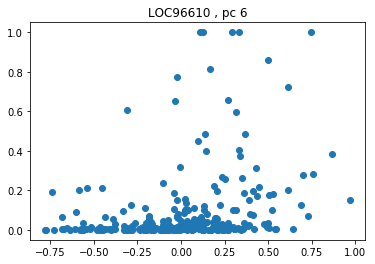

(0.0379228823397136, 0.5128947773738775)


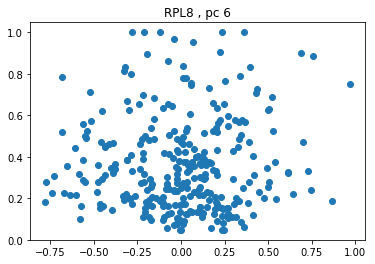

(-0.024664292464468242, 0.6704872365065031)


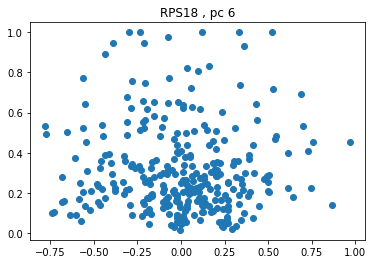

(0.12657833860918535, 0.02837424981062597)


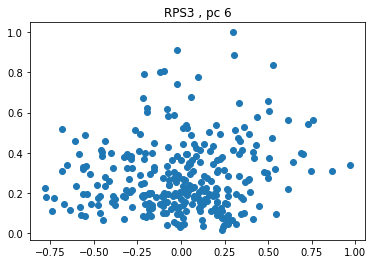

(0.0512631145921279, 0.37627617971401117)


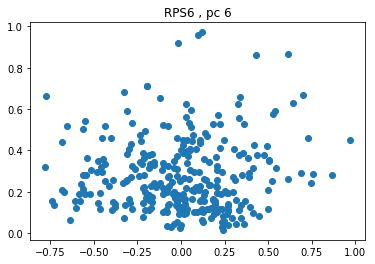

(0.10013804246922274, 0.083352669932558)


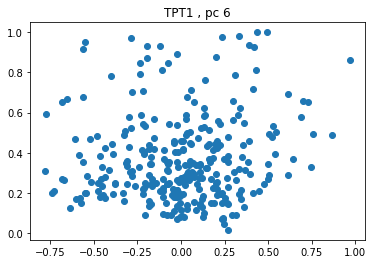

(-0.02448953483239694, 0.6726865346168651)


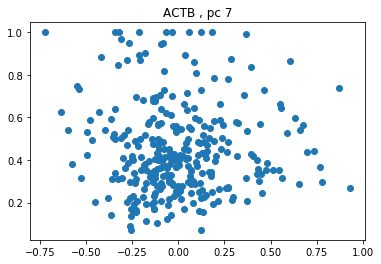

(0.078908580805333, 0.1728329000970983)


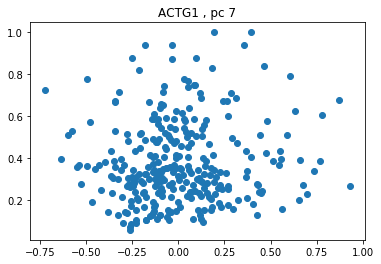

(0.04729452362005799, 0.41438446095658277)


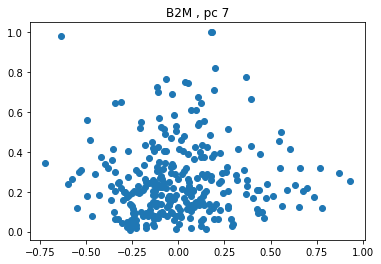

(-0.13278118390910984, 0.02142377966018196)


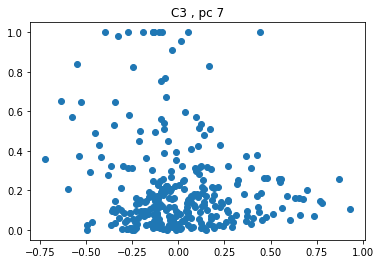

(0.24701376667698005, 1.506112349950797e-05)


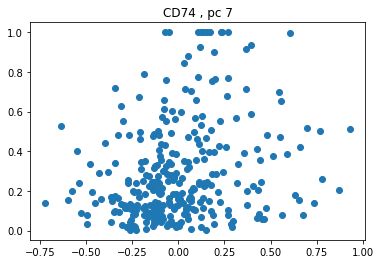

(-0.3173781141139094, 1.9077106845054887e-08)


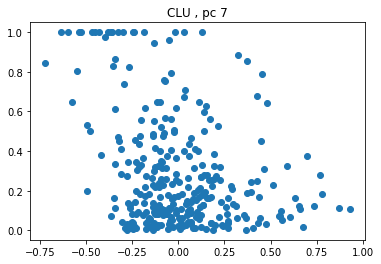

(-0.018373275493976972, 0.7512946714802082)


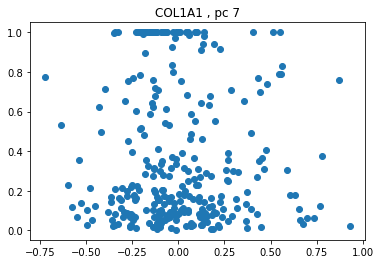

(-0.020623202521996255, 0.7220270673607623)


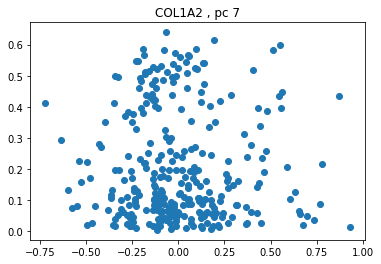

(-0.03544148966094974, 0.5408725443820919)


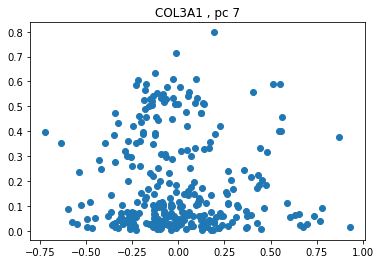

(0.24757270779923468, 1.438496059580268e-05)


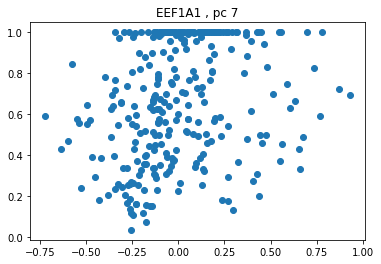

(-0.03453779312314404, 0.5512469797921276)


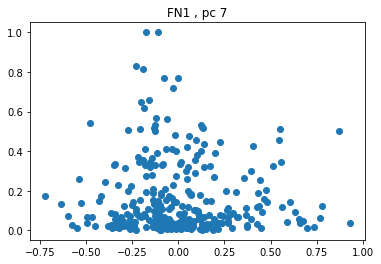

(0.045351859440315175, 0.4338381041921491)


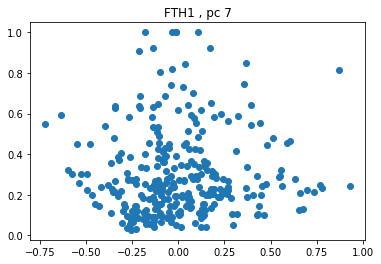

(-0.10791841161741682, 0.061921974718605124)


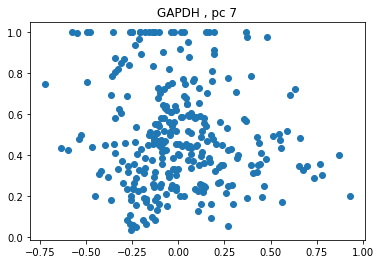

(0.7581682814919424, 2.761336847759876e-57)


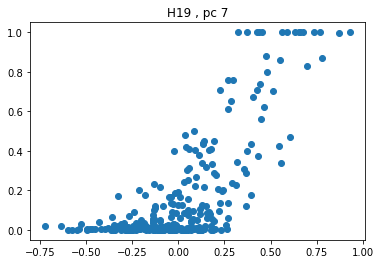

(-0.09720700789275513, 0.0928351503874309)


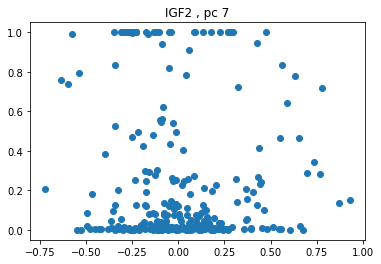

(-0.061009101448244465, 0.29221329671097307)


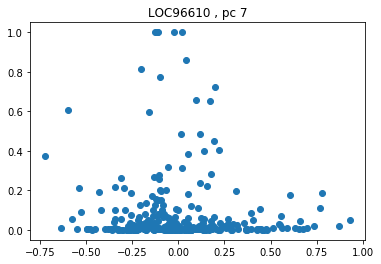

(0.029422287356884663, 0.6117399079176022)


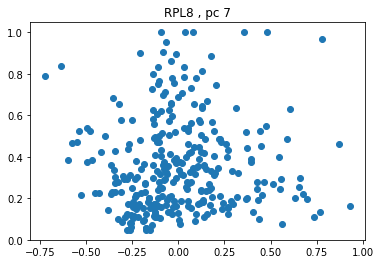

(0.03472612428848565, 0.5490769320649527)


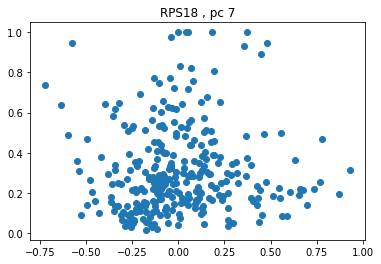

(0.024735387072549717, 0.669593323725024)


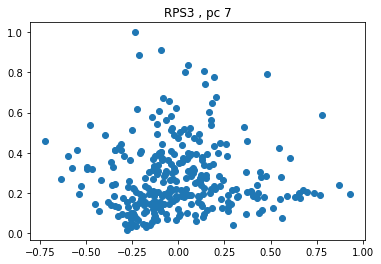

(0.05540040810634867, 0.33892474368858283)


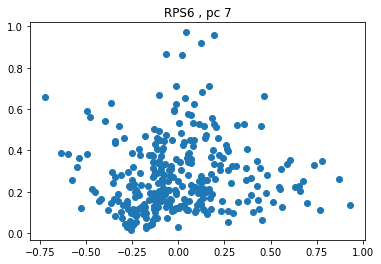

(0.006440454823682968, 0.9115470336213253)


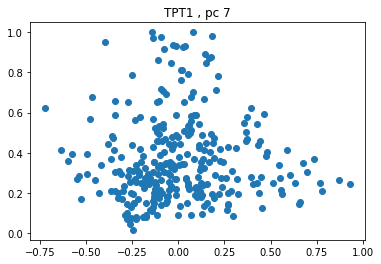

(-0.01701620965553048, 0.7691245229179859)


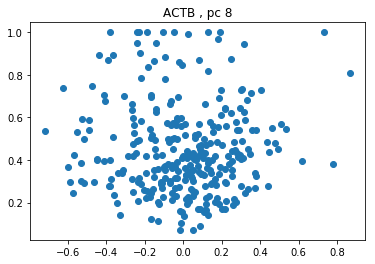

(-0.0025948357941350413, 0.9643015390779407)


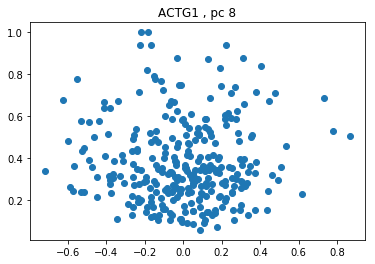

(0.14881762003418975, 0.009845039561647293)


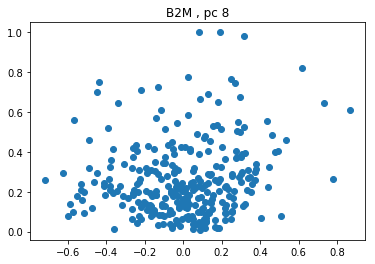

(0.25261113069265523, 9.46149177675515e-06)


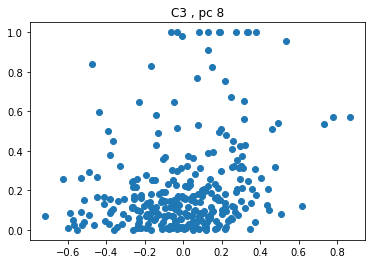

(0.19264017181730242, 0.0007960422469122007)


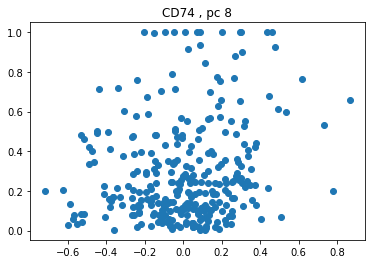

(-0.12398775778367331, 0.0318047304474415)


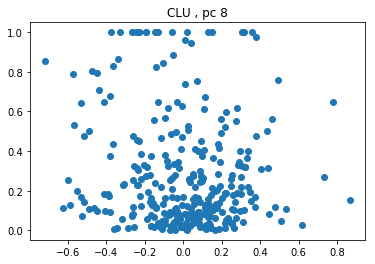

(0.001367150288637926, 0.9811869128507936)


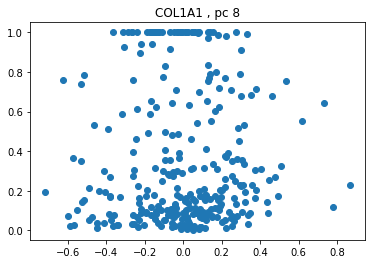

(0.008996646681563534, 0.8766801191928112)


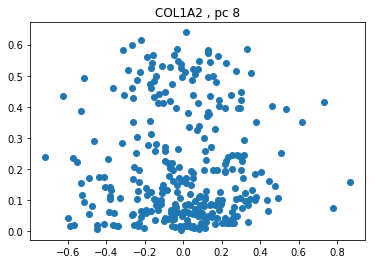

(0.004484514725937847, 0.9383449581788723)


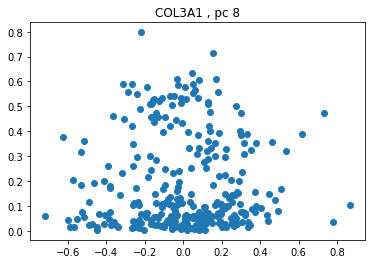

(0.23371911555154626, 4.3512180304519415e-05)


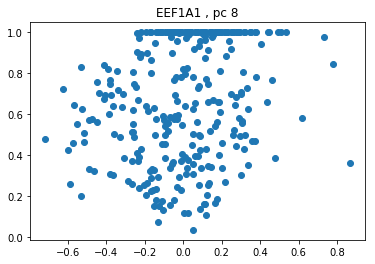

(0.0327789374408424, 0.5717135393914391)


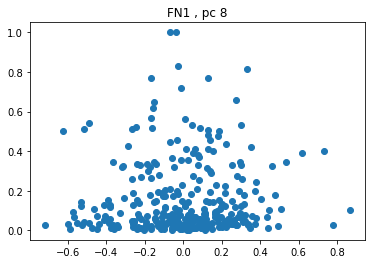

(-0.15326922464050077, 0.007829179550088708)


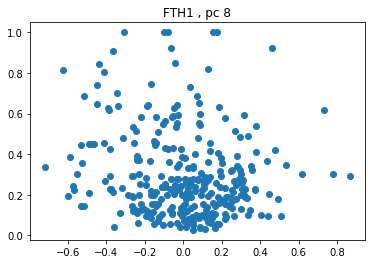

(-0.2905363459563002, 3.020867115337416e-07)


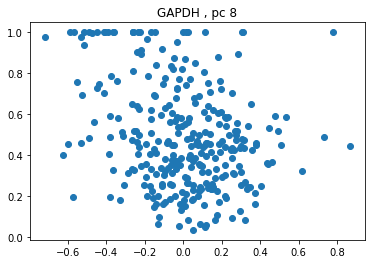

(-0.2561914974459498, 6.987534918985331e-06)


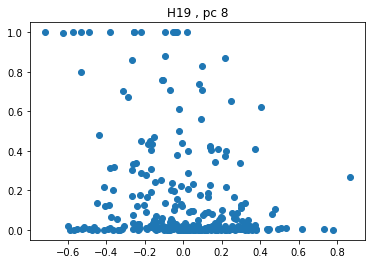

(0.24494868871286662, 1.783008902036319e-05)


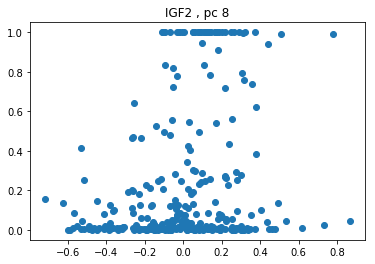

(0.281760065559849, 7.023212859670151e-07)


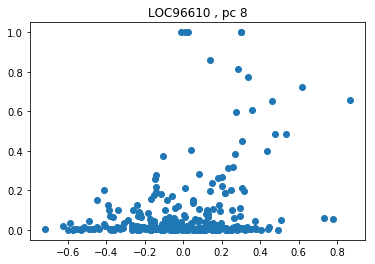

(-0.10077770093878408, 0.08139072915483327)


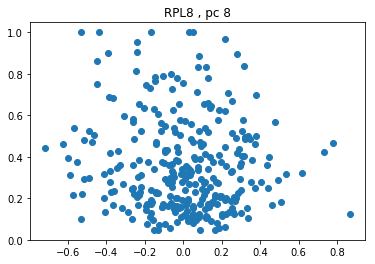

(0.10708392489695788, 0.06397779989224352)


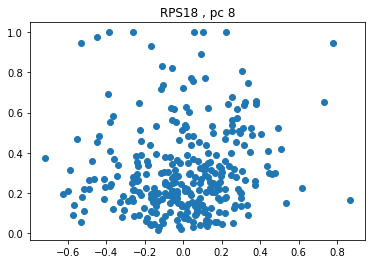

(-0.04516491237086934, 0.43573747762506354)


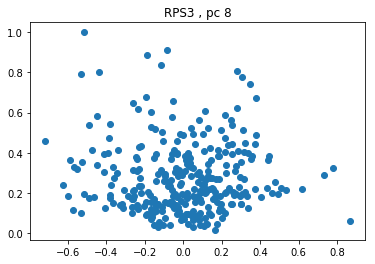

(0.03109379807984842, 0.5916532508073262)


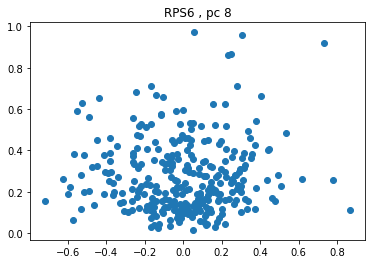

(0.023464685033836287, 0.685639721209113)


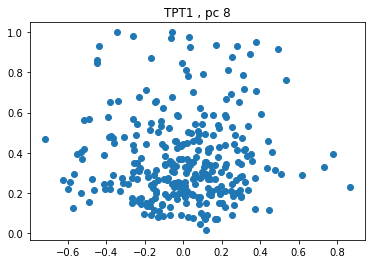

(0.032948850468992985, 0.569720788559898)


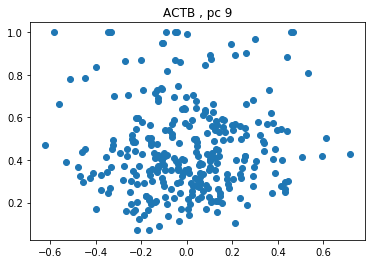

(-0.18284495074977922, 0.0014696962762903963)


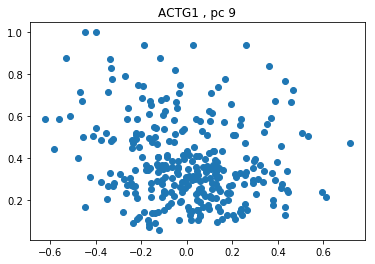

(0.05112023691937469, 0.3776096621600311)


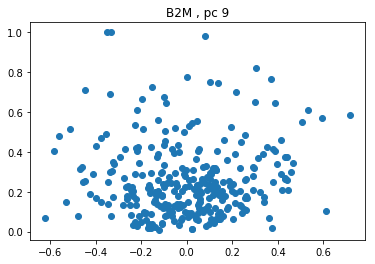

(0.1903059502801298, 0.0009237994464854513)


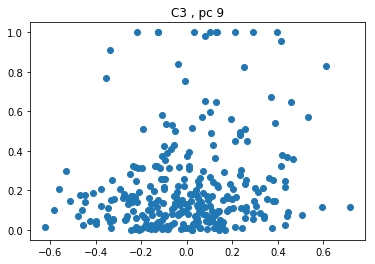

(-0.16765433850777867, 0.0035868940497303325)


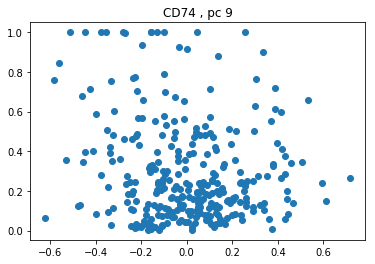

(0.12243904691360392, 0.034019940168399945)


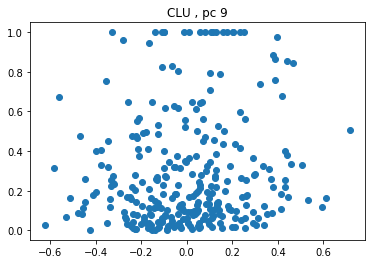

(0.027844448141859813, 0.6309715891490987)


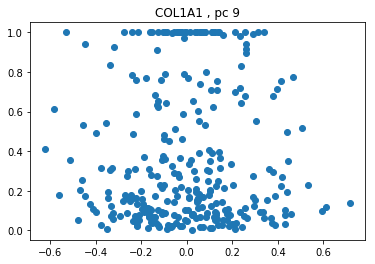

(0.036494813389103445, 0.5289041919257882)


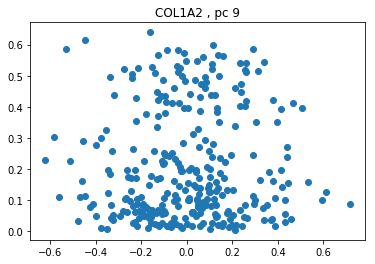

(0.03043436356259441, 0.599541720975098)


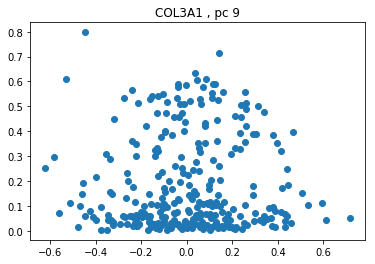

(-0.10485781807606145, 0.06973757574348505)


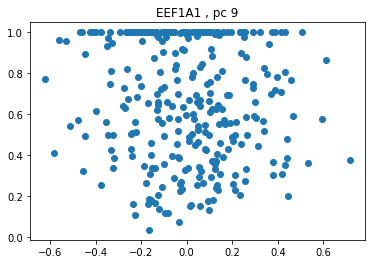

(0.07603116079280234, 0.18908106630846808)


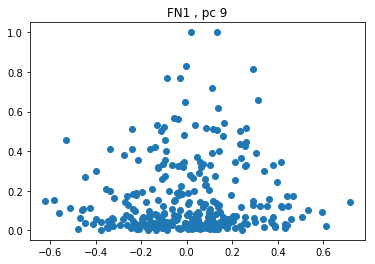

(-0.1283058760787492, 0.026267212477138053)


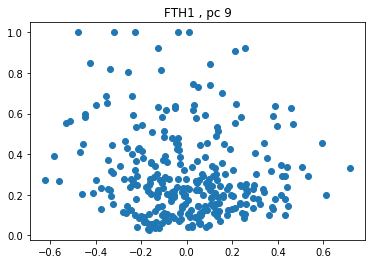

(-0.02035247874674145, 0.7255283281714555)


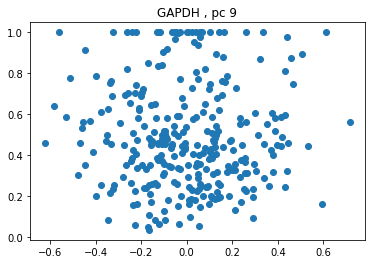

(0.2903439272379393, 3.078215157860625e-07)


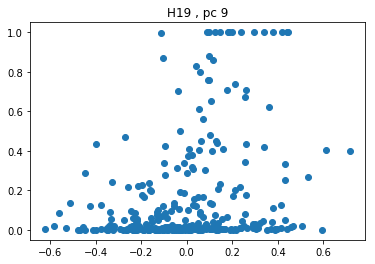

(-0.043708517279459735, 0.45069683255052795)


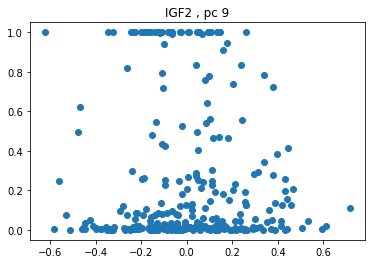

(0.3979281656787175, 7.982191757052732e-13)


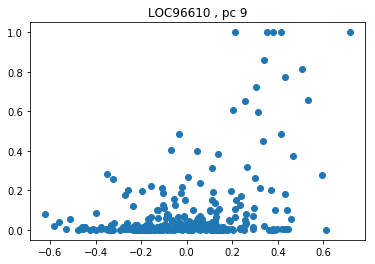

(-0.3160524779455288, 2.2009960286989378e-08)


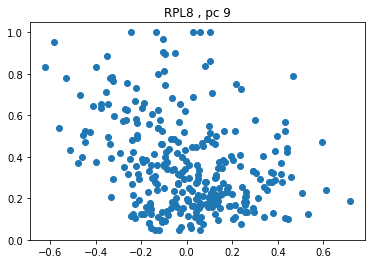

(0.08180015874109567, 0.15757488713150022)


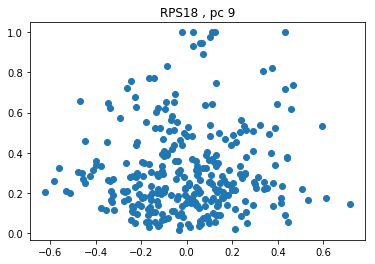

(0.06428513619489526, 0.26701998473947863)


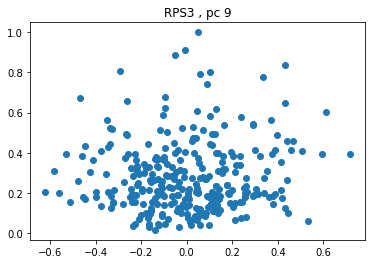

(0.15311546382668126, 0.00789214991278366)


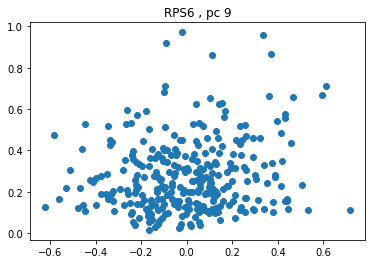

(0.19532347124958915, 0.0006694313567702925)


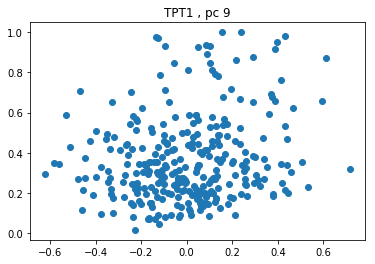

(0.1426318196536585, 0.013405998386341256)


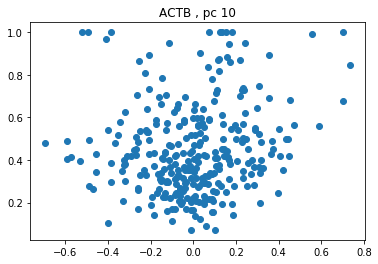

(-0.036867308095011514, 0.5247040645276076)


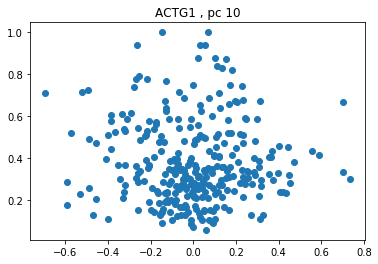

(-0.07971510255353424, 0.16847066710546044)


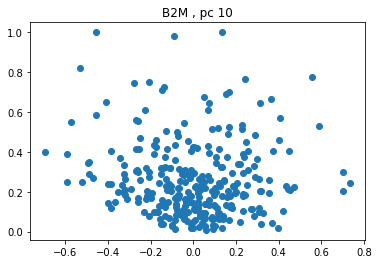

(0.35822132512891736, 1.6368173426269002e-10)


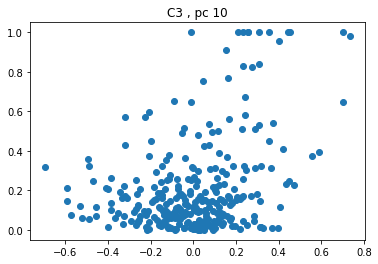

(-0.032277191171827674, 0.5776172177076915)


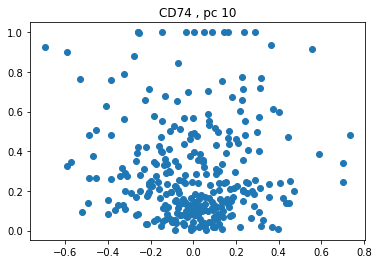

(-0.13990192013485464, 0.015308640077863098)


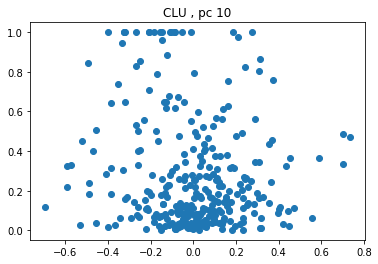

(-0.03957313897290923, 0.4947123954932847)


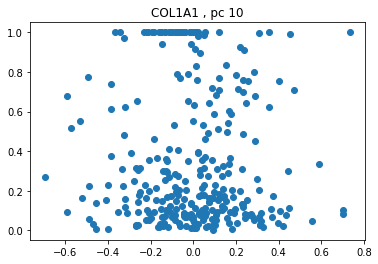

(-0.0570759824044315, 0.324495692729757)


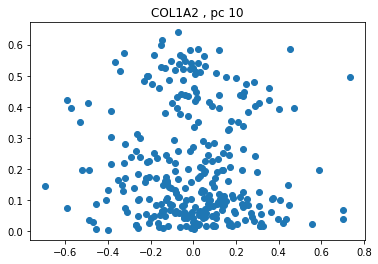

(-0.030718362740147127, 0.596138576612298)


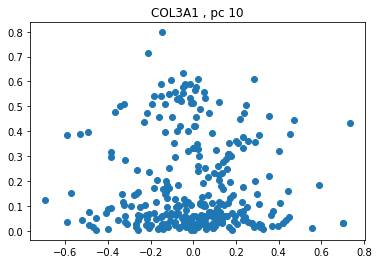

(0.22575944206335224, 7.980225440426327e-05)


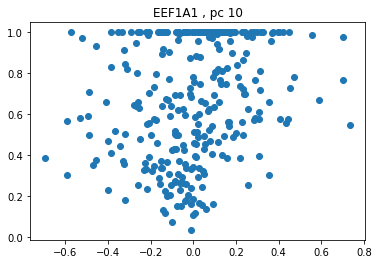

(0.001386640044042631, 0.9809187686657057)


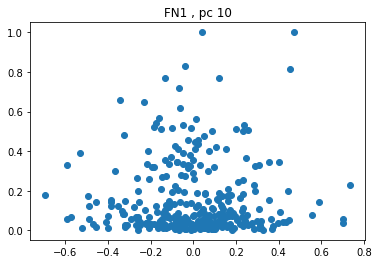

(0.25626515893138874, 6.943768512806245e-06)


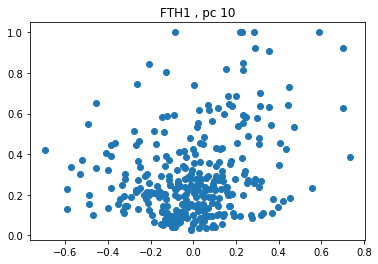

(0.004942392052676972, 0.9320643185868024)


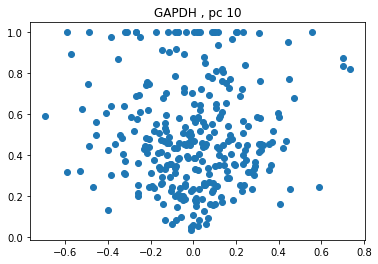

(-0.09329403670028845, 0.10681551035994923)


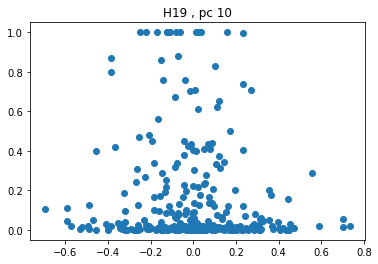

(0.04096190432936434, 0.4796809207557363)


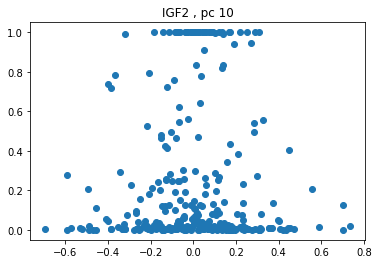

(-0.43007065269890293, 6.171129750717999e-15)


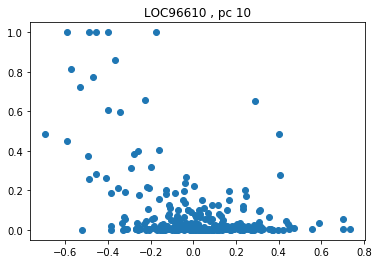

(-0.2073582179541488, 0.000299265339793939)


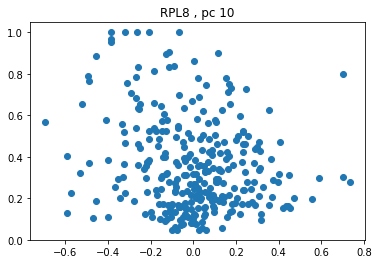

(-0.028130050766416514, 0.6274714943300266)


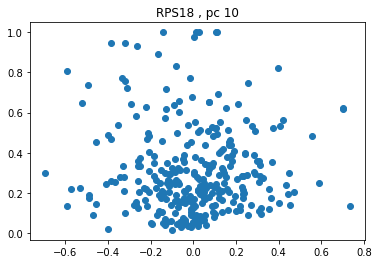

(-0.0940313596684414, 0.10406135806628986)


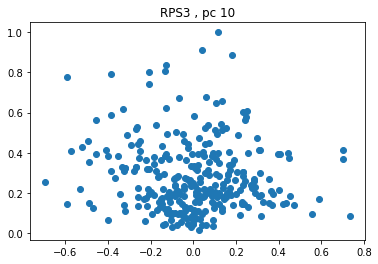

(0.010329835512691133, 0.858584892014107)


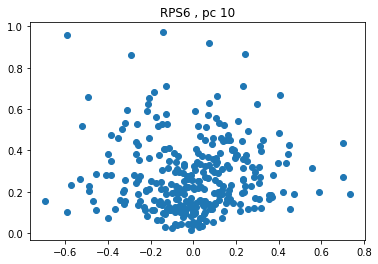

(0.22079803727449562, 0.00011522640914849466)


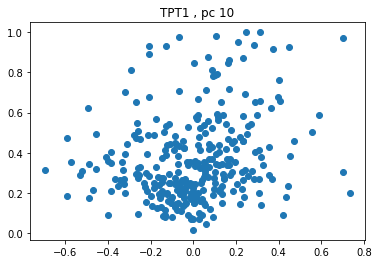

<Figure size 432x288 with 0 Axes>

In [20]:
#Compare PCA analysis with varience threshold
import scipy
for pc in ['pc 1', 'pc 2','pc 3','pc4','pc 5','pc 6','pc 7','pc 8','pc 9','pc 10']:
    for gene in name_top_genes:
        pc1 = principalDf[pc]
        gene_value = topgenes[gene]
        print(scipy.stats.pearsonr(pc1, gene_value))
        plt.plot(pc1, gene_value, linestyle="", marker="o")
        plt.title(str(dic_genes_id[gene])+" , "+pc)
        plt.show()
    

# choose the number of components in a Principal Component Analysis ( scree plot).

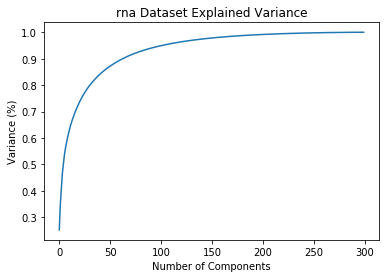

In [19]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_rna_t)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('rna Dataset Explained Variance')
plt.show()

A scree plot displays the eigenvalues associated with a component or factor in descending order versus the number of the component or factor. You can use scree plots in principal components analysis and factor analysis to visually assess which components or factors explain most of the variability in the data.